In [ ]:
! pip install netcdf4
! pip install Basemap
! pip install geopandas
! pip install cartopy
! pip install rasterio
! pip install rasterstats
! pip install numpy
! pip install pandas
! pip install shapely
! pip install pygeos
! pip install rtree
! pip install xarray
! pip install intake-esm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 32.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 80.7 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.

In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import pandas as pd
#import cartopy.crs as ccrs
import rasterio as rio
from rasterio.plot import show
import rasterstats
from affine import Affine
#import cartopy.crs as ccrs
from rasterstats import zonal_stats
import pygeos
import rtree
import xarray as xr
import numpy.ma as ma


/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-2-c4624d7a9ac0>:5: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling Py

In [ ]:
#create decadal average file(2015-2024)
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20150101-20151231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20160101-20161231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20170101-20171231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20180101-20181231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20190101-20191231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20200101-20201231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20210101-20211231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20220101-20221231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20230101-20231231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20240101-20241231.nc'
]

datasets = [xr.open_dataset(file_path) for file_path in file_paths]
combined_dataset = xr.concat(datasets, dim='time')

decadal_average = combined_dataset['tas'].mean(dim='time')

output_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/2015-2024_decadal_average.nc'
decadal_average.to_netcdf(output_path)

for ds in datasets:
    ds.close()



In [ ]:
#create decadal average file(2050-2059)
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20500101-20501231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20510101-20511231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20520101-20521231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20530101-20531231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20540101-20541231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20550101-20551231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20560101-20561231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20570101-20571231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20580101-20581231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20590101-20591231.nc'
]

datasets = [xr.open_dataset(file_path) for file_path in file_paths]
combined_dataset = xr.concat(datasets, dim='time')

decadal_average = combined_dataset['tas'].mean(dim='time')

output_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/2050-2059_decadal_average.nc'
decadal_average.to_netcdf(output_path)

for ds in datasets:
    ds.close()



In [ ]:
#create decadal average file(2090-2099)
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20900101-20901231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20910101-20911231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20920101-20921231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20930101-20931231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20940101-20941231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20950101-20951231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20960101-20961231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20970101-20971231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20980101-20981231.nc',
    '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20990101-20991231.nc'
]

datasets = [xr.open_dataset(file_path) for file_path in file_paths]
combined_dataset = xr.concat(datasets, dim='time')

decadal_average = combined_dataset['tas'].mean(dim='time')

output_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/2090-2099_decadal_average.nc'
decadal_average.to_netcdf(output_path)

for ds in datasets:
    ds.close()

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


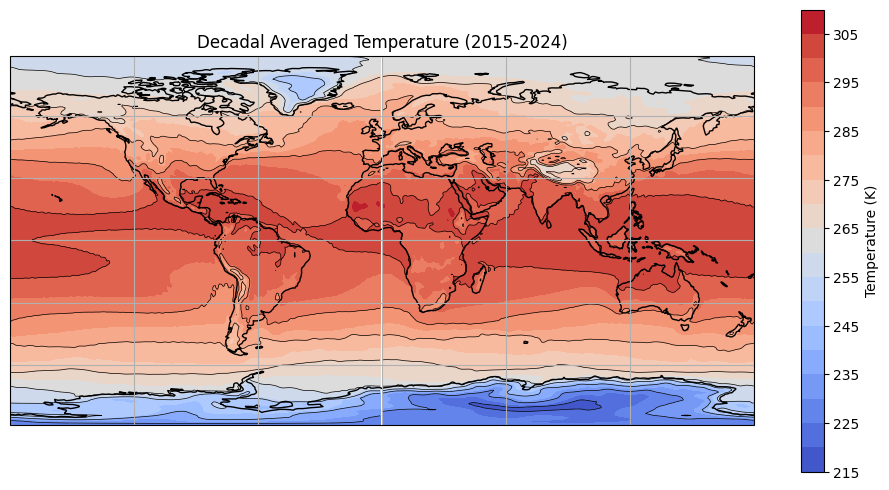

In [ ]:
import cartopy.crs as ccrs

decadal_average_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/2015-2024_decadal_average.nc'
decadal_average = xr.open_dataset(decadal_average_path)

lats = decadal_average['lat']
lons = decadal_average['lon']
tas_values = decadal_average['tas']

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

contour = plt.contourf(lons, lats, tas_values, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

contour_lines = plt.contour(lons, lats, tas_values, levels=10, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())

cbar = plt.colorbar(contour)
cbar.set_label('Temperature (K)')

ax.coastlines()
ax.gridlines()

plt.title('Decadal Averaged Temperature (2015-2024)')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')

plt.show()


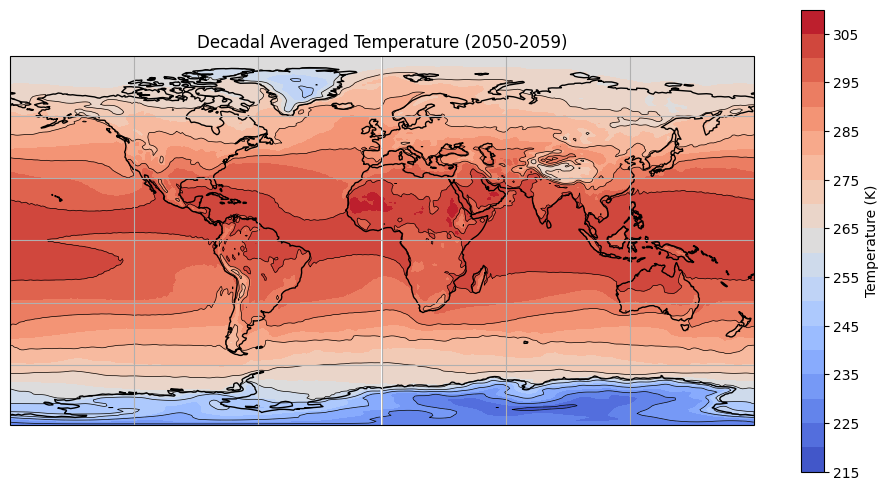

In [ ]:

decadal_average_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/2050-2059_decadal_average.nc'
decadal_average= xr.open_dataset(decadal_average_path)

lats = decadal_average['lat']
lons = decadal_average['lon']
tas_values = decadal_average['tas']

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

contour = plt.contourf(lons, lats, tas_values, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

contour_lines = plt.contour(lons, lats, tas_values, levels=10, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())

cbar = plt.colorbar(contour)
cbar.set_label('Temperature (K)')

ax.coastlines()
ax.gridlines()

plt.title('Decadal Averaged Temperature (2050-2059)')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')

plt.show()


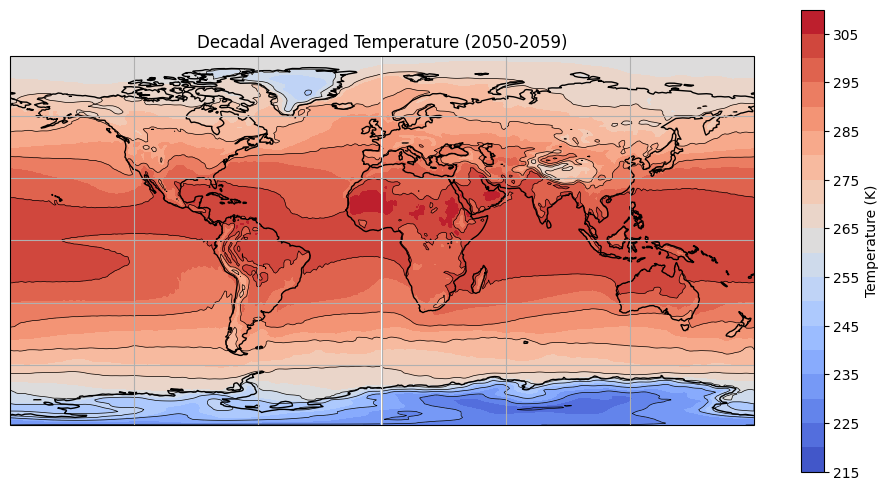

In [ ]:
decadal_average_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/2090-2099_decadal_average.nc'
decadal_average= xr.open_dataset(decadal_average_path)

lats = decadal_average['lat']
lons = decadal_average['lon']
tas_values = decadal_average['tas']

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

contour = plt.contourf(lons, lats, tas_values, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

contour_lines = plt.contour(lons, lats, tas_values, levels=10, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())

cbar = plt.colorbar(contour)
cbar.set_label('Temperature (K)')

ax.coastlines()
ax.gridlines()

plt.title('Decadal Averaged Temperature (2050-2059)')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')

plt.show()


In [ ]:
present_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/2015-2024_decadal_average.nc'
mid_century_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2050-2059_245/2050-2059_decadal_average.nc'

ds_present = xr.open_dataset(present_path)
ds_mid_century = xr.open_dataset(mid_century_path)

temperature_change = ds_mid_century['tas'] - ds_present['tas']

output_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/mid_vs_pres_temp_diff.nc'
temperature_change.to_netcdf(output_path)

ds_present.close()
ds_mid_century.close()

In [ ]:
present_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2015-2024_245/2015-2024_decadal_average.nc'
end_century_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/2090-2099_245/2090-2099_decadal_average.nc'

ds_present = xr.open_dataset(present_path)
ds_end_century = xr.open_dataset(end_century_path)
temperature_change = ds_end_century['tas'] - ds_present['tas']
output_path = '/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/end_vs_pres_temp_diff.nc'
temperature_change.to_netcdf(output_path)

ds_present.close()
ds_end_century.close()

In [ ]:
nc_file_path = '/content/drive/MyDrive/Colab Notebooks/capstone/temperature_change_end_to_present.nc'
ds = xr.open_dataset(nc_file_path)
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds.lon)
print(ds.lon)
ds.to_netcdf('/content/drive/MyDrive/Colab Notebooks/capstone/adj_temperature_change_end_to_present.nc')

<xarray.DataArray 'lon' (lon: 384)>
array([-180.    , -179.0625, -178.125 , ...,  177.1875,  178.125 ,  179.0625])
Coordinates:
  * lon      (lon) float64 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1
    height   float64 ...


In [ ]:
from shapely.geometry import Polygon
from affine import Affine
import folium
from folium import FeatureGroup, LayerControl

gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/capstone/ne_10m_admin_0_countries.zip")
netcdf_file_path = "/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/adj_mid_vs_pres_temp_diff.nc"

with rasterio.open(netcdf_file_path) as src:

    temperature_data = src.read(1)
    transform = src.transform
    height, width = temperature_data.shape

    grid_cells = []

    for row in range(height):
        for col in range(width):
            x, y = transform * (col, row)
            x2, y2 = transform * (col + 1, row + 1)

            polygon = Polygon([(x, y), (x2, y), (x2, y2), (x, y2)])

            temperature = temperature_data[row, col]

            grid_cells.append({'geometry': polygon, 'temperature': temperature})

    grid_gdf = gpd.GeoDataFrame(grid_cells)
    grid_gdf.crs = "EPSG:4326"

mean_temperatures = []
std_dev_temperatures = []
grid_counts = []

for index, row in gdf.iterrows():
    #intersection of the country with grid cell
    country_gdf = gpd.GeoDataFrame([row], geometry=[row.geometry], crs=gdf.crs)
    intersections = gpd.overlay(grid_gdf, country_gdf, how='intersection')

    total_area = row.geometry.area

    weighted_temp_sum = 0
    grid_count = 0
    for _, intersection_row in intersections.iterrows():
      intersection_area = intersection_row.geometry.area
      temperature = intersection_row.temperature
      weighted_temp_sum += (intersection_area / total_area) * temperature
      grid_count += 1

    mean_temperature = weighted_temp_sum
    mean_temperatures.append(mean_temperature)
    grid_counts.append(grid_count)

    if grid_count > 1:
      temperatures = intersections['temperature'].to_numpy()
      std_dev = np.std(temperatures)
    else:
      std_dev = 0

    std_dev_temperatures.append(std_dev)

results_df = pd.DataFrame({
    'country_name': gdf['ADMIN'],
    'mean_temperature': mean_temperatures,
    'std_dev_temperature': std_dev_temperatures,
    'grid_count': grid_counts
})
results_df = results_df.dropna()

gdf_merged = gdf.merge(results_df, left_on='ADMIN', right_on='country_name', how='left')

'''results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/SSP 245/mid_vs_pres_country.csv', index=False)'''

m = folium.Map(location=[0, 0], zoom_start=2)
choropleth = folium.Choropleth(
    geo_data=gdf_merged,
    data=gdf_merged,
    columns=['ADMIN', 'mean_temperature'],
    key_on='feature.properties.ADMIN',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Weighted Mean Temperatures by Country'
).add_to(m)
LayerControl().add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.